In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
base = pd.read_csv('../bases/anos_e_paises.csv')
world = gpd.read_file('../maps/mundo.shp')

In [8]:
base['Ano'].unique()

array([2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])

In [10]:
#Escolhe os anos
anos = [
    2004, 
#     2006,
#     2008,
#     2010,
#     2012,
#     2014,
    2016,
    2018
       ]

/home/darlon/Pesquisa/env/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


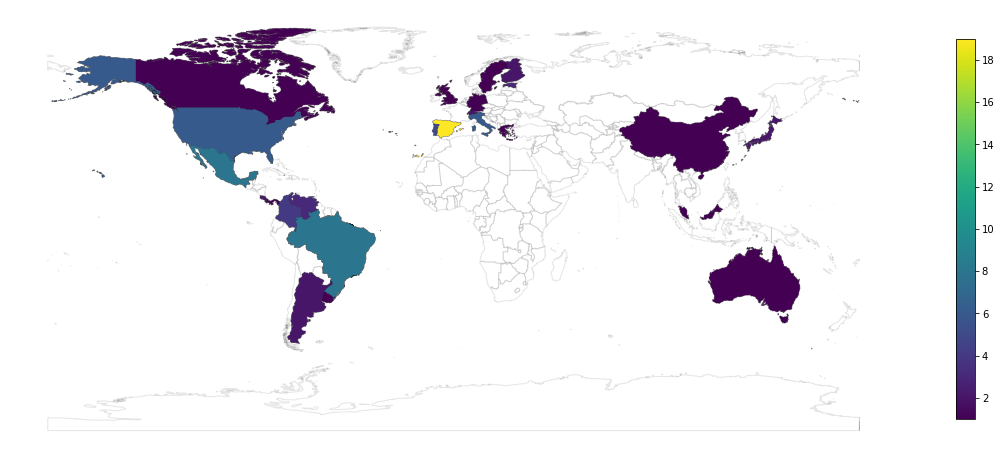

In [12]:
#Conta o numero de publicacoes
res = pd.DataFrame(base[base['Ano'].isin(anos)]['Pais'].value_counts())
res.columns = ['N']


#Prepara o mapa
mundo = world.copy()
mundo.index = mundo['CNTRY_NAME']
mundo['N'] = res['N']
mundo = mundo[~mundo['N'].isna()]

#Mostra o mapa

f, mapa = plt.subplots(figsize=(20,20))
world.plot(ax=mapa, color='w', edgecolor='k', alpha=0.1)
mundo.plot(column='N', ax=mapa, color='k', edgecolor='k', alpha=0.4)
mundo.plot(column='N', ax=mapa, legend=True, legend_kwds={'shrink': 0.35})
mapa.set_axis_off()
plt.show()


In [13]:
res[['N']]

,N
Spain,19
Brazil,8
Mexico,8
United States,6
Italy,6
Portugal,5
Colombia,4
Estonia,3
Venezuela,3
Costa Rica,2
